In [1]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_column", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df1= pd.read_csv('Premier League Football Predictions 2019_2020.csv')
df2 = pd.read_csv('Premier League Football Predictions 2020_2021.csv')
df3 = pd.read_csv('Premier League Football Predictions 2021_2022.csv')
df4 = pd.read_csv('Premier League Football Predictions 2022_2023.csv')
df5 = pd.read_csv('Premier League Football Predictions 2023_2024.csv')

In [3]:
df1.shape, df2.shape, df3.shape, df4.shape, df5.shape

((380, 106), (380, 106), (380, 106), (380, 106), (380, 106))

In [4]:
# Concatenate the dataframes to create a single dataframe with 1,900 records
English_Premier_League = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Check the shape of the combined dataframe to ensure it has 1,900 records
English_Premier_League.shape

(1900, 106)

In [5]:
English_Premier_League.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,8.00,18.00,1.15,9.59,18.05,1.12,8.5,21.00,1.14,9.5,23.00,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,-2.25,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,1.14,9.50,21.00,1.14,9.0,20.00,1.15,8.00,18.00,1.14,10.43,19.63,1.11,9.5,21.00,1.14,9.50,23.00,1.16,10.50,23.00,1.14,9.52,19.18,1.3,3.50,1.34,3.44,1.36,3.76,1.32,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.50,5.75,1.26,11.00,6.10,1.25,11.68,6.53,1.26,13.00,6.0,1.24,12.00,6.5,1.25,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,1.75,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,12.00,7.00,1.25,11.00,6.0,1.26,11.00,6.10,1.25,11.11,6.68,1.27,11.00,6.5,1.24,12.00,6.50,1.25,13.00,7.00,1.29,11.14,6.46,1.26,1.4,3.00,1.43,3.03,1.50,3.22,1.41,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,1.95,3.60,3.90,1.97,3.55,3.80,2.04,3.57,3.90,2.00,3.5,3.80,2.00,3.6,4.00,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,-0.50,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,1.95,3.70,4.20,1.95,3.6,3.90,1.97,3.55,3.85,1.98,3.67,4.06,1.95,3.6,3.90,2.00,3.60,4.00,2.03,3.70,4.20,1.98,3.58,3.96,1.9,1.90,1.94,1.97,1.97,1.98,1.91,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.65,3.20,2.75,2.65,3.20,2.75,2.71,3.31,2.81,2.70,3.2,2.75,2.70,3.3,2.80,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,0.00,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,2.70,3.25,2.90,2.65,3.1,2.85,2.60,3.20,2.85,2.71,3.19,2.90,2.62,3.2,2.80,2.70,3.25,2.90,2.72,3.26,2.95,2.65,3.18,2.88,2.1,1.72,2.19,1.76,2.25,1.78,2.17,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.20,3.20,2.35,3.10,3.20,2.40,3.21,3.37,2.39,3.10,3.3,2.35,3.20,3.3,2.45,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,0.25,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,3.40,3.50,2.25,3.30,3.3,2.25,3.40,3.30,2.20,3.37,3.45,2.27,3.30,3.3,2.25,3.40,3.30,2.25,3.55,3.50,2.34,3.41,3.37,2.23,2.2,1.66,2.22,1.74,2.28,1.77,2.17,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [6]:
English_Premier_League.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [7]:
English_Premier_League.shape

(1900, 106)

In [8]:
# Check the information of the dataset
English_Premier_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 1.5+ MB


In [9]:
English_Premier_League.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
FTHG,1.563158,1.344233,0.00,1.00,1.00,2.00,9.00
FTAG,1.310000,1.238833,0.00,0.00,1.00,2.00,9.00
HTHG,0.707895,0.859504,0.00,0.00,1.00,1.00,5.00
HTAG,0.586842,0.789168,0.00,0.00,0.00,1.00,5.00
HS,13.868421,5.755008,1.00,10.00,13.00,17.00,36.00
...,...,...,...,...,...,...,...
PCAHA,1.968989,0.101888,1.30,1.89,1.96,2.05,2.38
MaxCAHH,2.014223,0.112214,1.80,1.93,2.01,2.09,3.95
MaxCAHA,2.026430,0.106409,1.30,1.94,2.02,2.11,2.52
AvgCAHH,1.934532,0.099936,1.70,1.86,1.93,2.01,3.66


# EDA

# Exploring result data

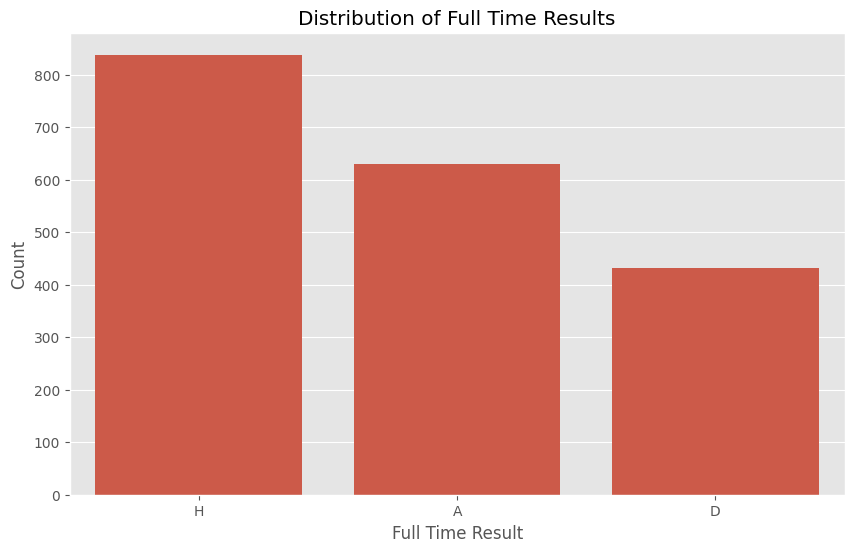

In [10]:
# Distribution of Full Time Results
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=English_Premier_League)
plt.title('Distribution of Full Time Results')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()

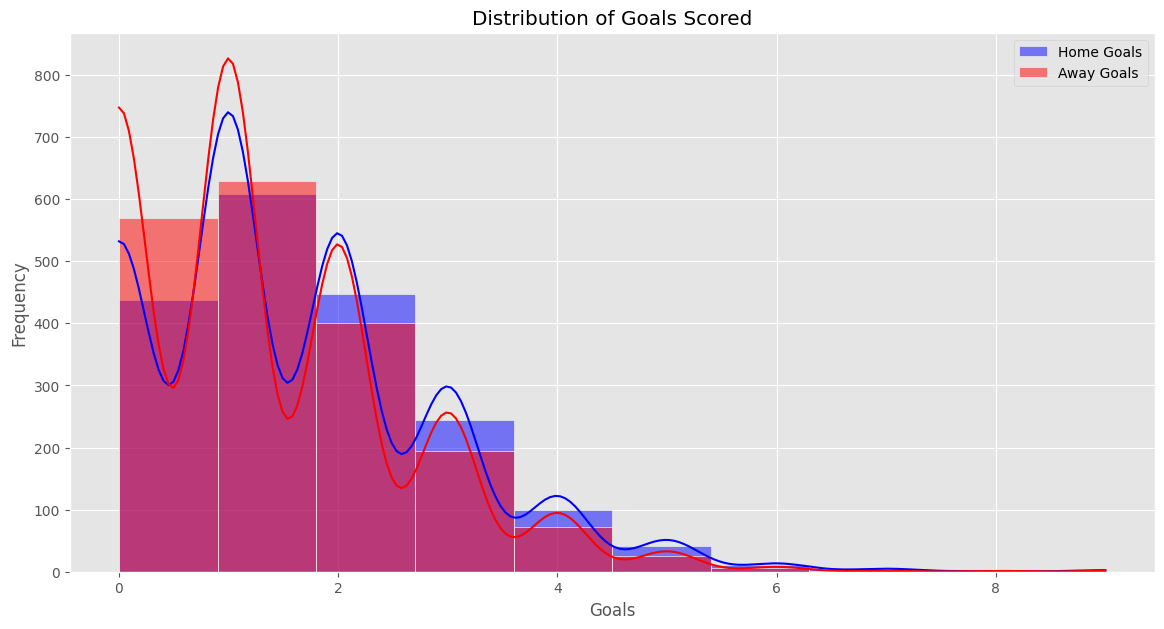

In [11]:
# Goals Scored Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['FTHG'], bins=10, kde=True, color='blue', label='Home Goals')
sns.histplot(English_Premier_League['FTAG'], bins=10, kde=True, color='red', label='Away Goals')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
# Home vs Away Wins
home_wins = English_Premier_League[English_Premier_League['FTR'] == 'H'].shape[0]
away_wins = English_Premier_League[English_Premier_League['FTR'] == 'A'].shape[0]
draws = English_Premier_League[English_Premier_League['FTR'] == 'D'].shape[0]
print(f'Home Wins: {home_wins}')
print(f'Away Wins: {away_wins}')
print(f'Draws: {draws}')


Home Wins: 838
Away Wins: 630
Draws: 432


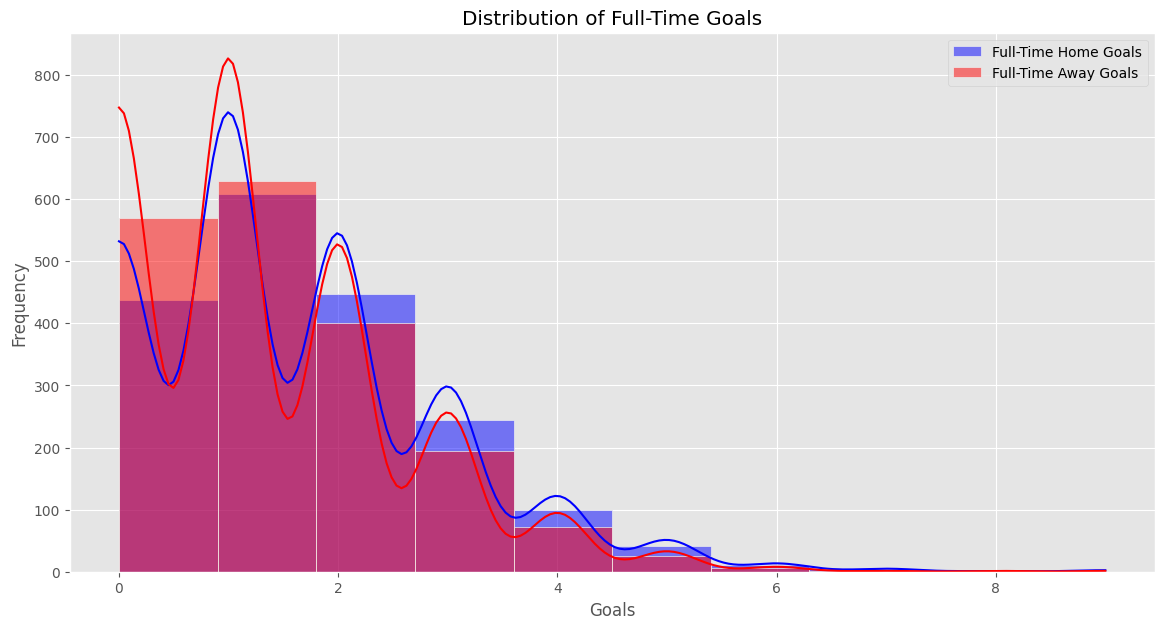

In [13]:
# Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['FTHG'], bins=10, kde=True, color='blue', label='Full-Time Home Goals')
sns.histplot(English_Premier_League['FTAG'], bins=10, kde=True, color='red', label='Full-Time Away Goals')
plt.title('Distribution of Full-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

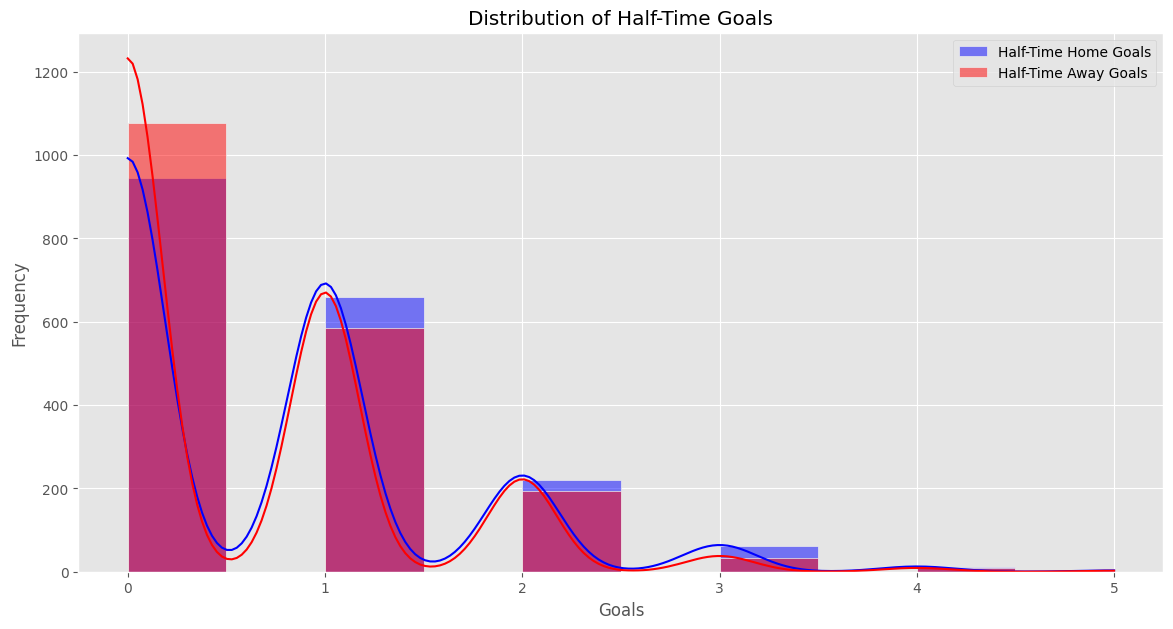

In [14]:
# Half-Time Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HTHG'], bins=10, kde=True, color='blue', label='Half-Time Home Goals')
sns.histplot(English_Premier_League['HTAG'], bins=10, kde=True, color='red', label='Half-Time Away Goals')
plt.title('Distribution of Half-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

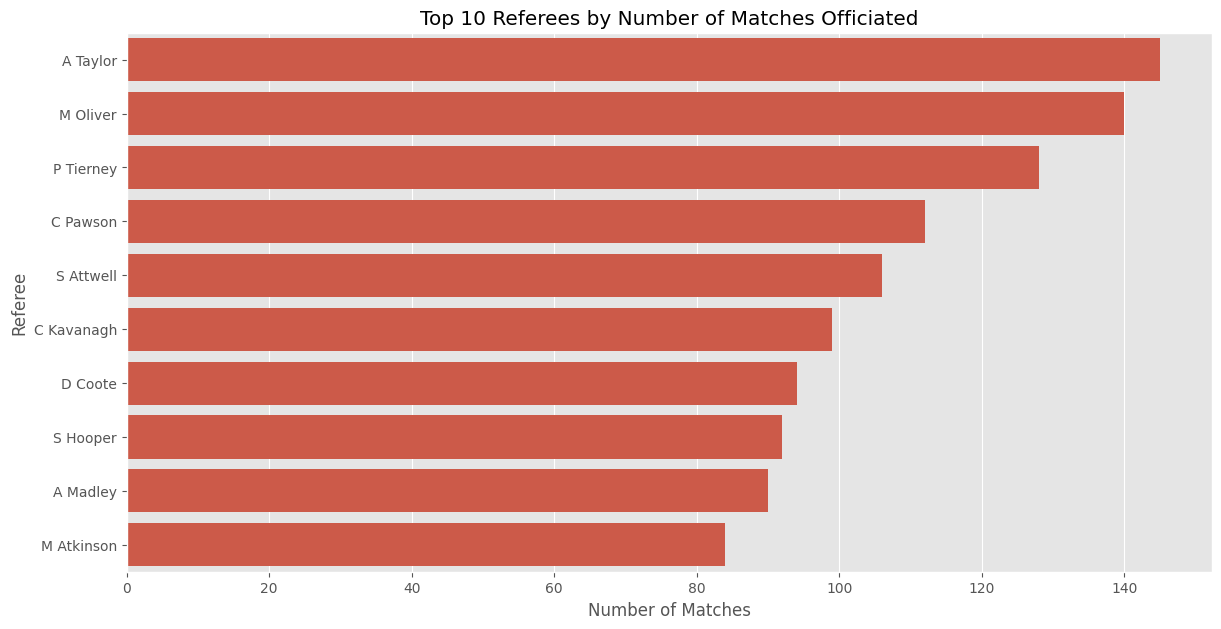

In [15]:
# Referee Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y='Referee', data=English_Premier_League, order=English_Premier_League['Referee'].value_counts().index[:10])
plt.title('Top 10 Referees by Number of Matches Officiated')
plt.xlabel('Number of Matches')
plt.ylabel('Referee')
plt.show()